## Using Keras to Build and Train Neural Networks

In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset.  We will start by training a Random Forest to get a performance baseline.  Then we will use the Keras package to quickly build and train a neural network and compare the performance.  We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

In [1]:
#Preliminaries

from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


In [3]:
## Load in the data set (Internet Access needed). Fixed the dataset

url = "http://www.dgadler.it/HMM/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(url, names=names, header='infer')

In [22]:
# Take a peek at the data -- if there are lots of "NaN" you may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
690,8,107,80,0,0,24.6,0.856,34,0
87,2,100,68,25,71,38.5,0.324,26,0
234,3,74,68,28,45,29.7,0.293,23,0
397,0,131,66,40,0,34.3,0.196,22,1
187,1,128,98,41,58,32.0,1.321,33,1


In [51]:
X = diabetes_df.iloc[:, :-1].values
#the output consists of the state with diabetes
y = diabetes_df["has_diabetes"].values

print(X)

print(y)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [25]:
# Split the data to Train, and Test (75%, 25%)
#y is the state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [26]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the ROC-AUC score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.

In [27]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
#we train both with X input data and Y input data
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test) #HARD
y_pred_prob_rf = rf_model.predict_proba(X_test) #SOFT


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.829


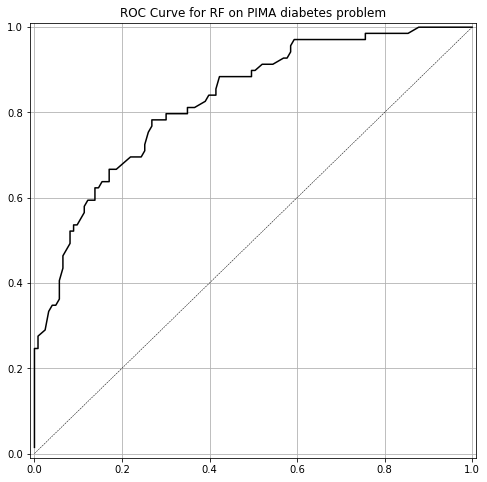

In [56]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [57]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications


normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [31]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [33]:
#  This is a nice tool to view the model you have created and count the parameters

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Comprehension question:
Why do we have 121 parameters?  Does that make sense?


Let's fit our model for 200 epochs.

In [34]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 0s 264us/step - loss: 0.7678 - acc: 0.4861 - val_loss: 0.7828 - val_acc: 0.4375
Epoch 2/200
576/576 [==============================] - 0s 28us/step - loss: 0.7546 - acc: 0.4896 - val_loss: 0.7707 - val_acc: 0.4375
Epoch 3/200
576/576 [==============================] - 0s 37us/step - loss: 0.7423 - acc: 0.5035 - val_loss: 0.7595 - val_acc: 0.4479
Epoch 4/200
576/576 [==============================] - 0s 37us/step - loss: 0.7310 - acc: 0.5260 - val_loss: 0.7491 - val_acc: 0.4688
Epoch 5/200
576/576 [==============================] - 0s 36us/step - loss: 0.7203 - acc: 0.5347 - val_loss: 0.7393 - val_acc: 0.4844
Epoch 6/200
576/576 [==============================] - 0s 44us/step - loss: 0.7105 - acc: 0.5451 - val_loss: 0.7302 - val_acc: 0.5000
Epoch 7/200
576/576 [==============================] - 0s 41us/step - loss: 0.7012 - acc: 0.5503 - val_loss: 0.7217 - val_acc: 0.5208
Epoch 8/200
576

576/576 [==============================] - 0s 41us/step - loss: 0.4867 - acc: 0.7483 - val_loss: 0.5312 - val_acc: 0.7344
Epoch 122/200
576/576 [==============================] - 0s 38us/step - loss: 0.4863 - acc: 0.7465 - val_loss: 0.5309 - val_acc: 0.7344
Epoch 123/200
576/576 [==============================] - 0s 37us/step - loss: 0.4858 - acc: 0.7483 - val_loss: 0.5305 - val_acc: 0.7344
Epoch 124/200
576/576 [==============================] - 0s 38us/step - loss: 0.4854 - acc: 0.7483 - val_loss: 0.5302 - val_acc: 0.7396
Epoch 125/200
576/576 [==============================] - 0s 44us/step - loss: 0.4850 - acc: 0.7483 - val_loss: 0.5298 - val_acc: 0.7396
Epoch 126/200
576/576 [==============================] - 0s 36us/step - loss: 0.4845 - acc: 0.7500 - val_loss: 0.5295 - val_acc: 0.7396
Epoch 127/200
576/576 [==============================] - 0s 41us/step - loss: 0.4841 - acc: 0.7500 - val_loss: 0.5292 - val_acc: 0.7396
Epoch 128/200
576/576 [==============================] - 0s 36

In [35]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [48]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]
y_pred_class_nn_1 #Resulting prediction for every single data point

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [47]:
#predictions' results from the test casa
y_pred_prob_nn_1[:10]


array([[0.47158974],
       [0.7717504 ],
       [0.2936714 ],
       [0.4548161 ],
       [0.20817392],
       [0.52120703],
       [0.04707582],
       [0.4031567 ],
       [0.7208713 ],
       [0.20087609]], dtype=float32)

accuracy is 0.745
roc-auc is 0.807


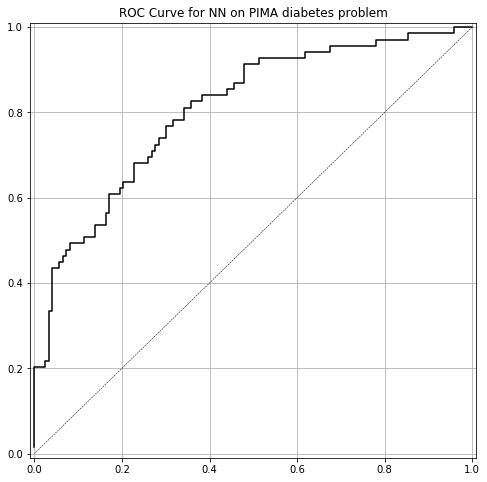

In [38]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.

Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.

In [39]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Let's plot the training loss and the validation loss over the different epochs and see how it looks.

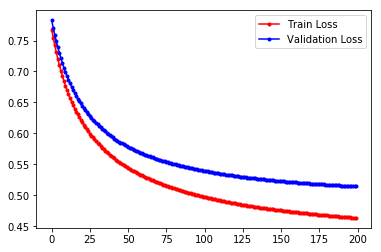

In [40]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.

In [41]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4631 - acc: 0.7674 - val_loss: 0.5140 - val_acc: 0.7448
Epoch 2/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4630 - acc: 0.7674 - val_loss: 0.5139 - val_acc: 0.7448
Epoch 3/1000
576/576 [==============================] - 0s 42us/step - loss: 0.4628 - acc: 0.7674 - val_loss: 0.5138 - val_acc: 0.7448
Epoch 4/1000
576/576 [==============================] - 0s 51us/step - loss: 0.4626 - acc: 0.7674 - val_loss: 0.5137 - val_acc: 0.7448
Epoch 5/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4624 - acc: 0.7674 - val_loss: 0.5135 - val_acc: 0.7448
Epoch 6/1000
576/576 [==============================] - 0s 46us/step - loss: 0.4622 - acc: 0.7691 - val_loss: 0.5134 - val_acc: 0.7448
Epoch 7/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4620 - acc: 0.7674 - val_loss: 0.5133 - val_acc: 0.7448
Epoch 8/1

Epoch 61/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4541 - acc: 0.7778 - val_loss: 0.5083 - val_acc: 0.7552
Epoch 62/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4540 - acc: 0.7778 - val_loss: 0.5082 - val_acc: 0.7500
Epoch 63/1000
576/576 [==============================] - 0s 43us/step - loss: 0.4539 - acc: 0.7760 - val_loss: 0.5082 - val_acc: 0.7500
Epoch 64/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4538 - acc: 0.7778 - val_loss: 0.5081 - val_acc: 0.7500
Epoch 65/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4536 - acc: 0.7778 - val_loss: 0.5081 - val_acc: 0.7500
Epoch 66/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4535 - acc: 0.7778 - val_loss: 0.5080 - val_acc: 0.7500
Epoch 67/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4534 - acc: 0.7778 - val_loss: 0.5079 - val_acc: 0.7500
Epoch 68/1000
576/576 [=========================

576/576 [==============================] - 0s 40us/step - loss: 0.4476 - acc: 0.7865 - val_loss: 0.5051 - val_acc: 0.7604
Epoch 122/1000
576/576 [==============================] - 0s 30us/step - loss: 0.4474 - acc: 0.7882 - val_loss: 0.5051 - val_acc: 0.7604
Epoch 123/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4474 - acc: 0.7865 - val_loss: 0.5050 - val_acc: 0.7604
Epoch 124/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4473 - acc: 0.7865 - val_loss: 0.5050 - val_acc: 0.7604
Epoch 125/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4472 - acc: 0.7882 - val_loss: 0.5050 - val_acc: 0.7604
Epoch 126/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4470 - acc: 0.7865 - val_loss: 0.5049 - val_acc: 0.7604
Epoch 127/1000
576/576 [==============================] - 0s 47us/step - loss: 0.4470 - acc: 0.7882 - val_loss: 0.5049 - val_acc: 0.7604
Epoch 128/1000
576/576 [==============================] 

Epoch 181/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4425 - acc: 0.7847 - val_loss: 0.5041 - val_acc: 0.7552
Epoch 182/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4424 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 183/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4423 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 184/1000
576/576 [==============================] - 0s 39us/step - loss: 0.4423 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 185/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4422 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 186/1000
576/576 [==============================] - 0s 30us/step - loss: 0.4421 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 187/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4421 - acc: 0.7847 - val_loss: 0.5040 - val_acc: 0.7552
Epoch 188/1000
576/576 [=================

Epoch 241/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4384 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7604
Epoch 242/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4383 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 243/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4382 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 244/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4382 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 245/1000
576/576 [==============================] - 0s 44us/step - loss: 0.4381 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 246/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4381 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 247/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4380 - acc: 0.7865 - val_loss: 0.5040 - val_acc: 0.7656
Epoch 248/1000
576/576 [=================

Epoch 301/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4351 - acc: 0.7830 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 302/1000
576/576 [==============================] - 0s 29us/step - loss: 0.4351 - acc: 0.7830 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 303/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4350 - acc: 0.7847 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 304/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4350 - acc: 0.7830 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 305/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4349 - acc: 0.7830 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 306/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4349 - acc: 0.7847 - val_loss: 0.5044 - val_acc: 0.7656
Epoch 307/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4348 - acc: 0.7847 - val_loss: 0.5045 - val_acc: 0.7656
Epoch 308/1000
576/576 [=================

Epoch 361/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4323 - acc: 0.7847 - val_loss: 0.5048 - val_acc: 0.7656
Epoch 362/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4323 - acc: 0.7847 - val_loss: 0.5048 - val_acc: 0.7656
Epoch 363/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4322 - acc: 0.7847 - val_loss: 0.5048 - val_acc: 0.7656
Epoch 364/1000
576/576 [==============================] - 0s 30us/step - loss: 0.4322 - acc: 0.7847 - val_loss: 0.5048 - val_acc: 0.7656
Epoch 365/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4322 - acc: 0.7847 - val_loss: 0.5048 - val_acc: 0.7656
Epoch 366/1000
576/576 [==============================] - 0s 39us/step - loss: 0.4321 - acc: 0.7847 - val_loss: 0.5049 - val_acc: 0.7656
Epoch 367/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4321 - acc: 0.7847 - val_loss: 0.5049 - val_acc: 0.7656
Epoch 368/1000
576/576 [=================

Epoch 421/1000
576/576 [==============================] - 0s 29us/step - loss: 0.4300 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 422/1000
576/576 [==============================] - 0s 48us/step - loss: 0.4300 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 423/1000
576/576 [==============================] - 0s 51us/step - loss: 0.4299 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 424/1000
576/576 [==============================] - 0s 45us/step - loss: 0.4299 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 425/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4299 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 426/1000
576/576 [==============================] - 0s 42us/step - loss: 0.4298 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7656
Epoch 427/1000
576/576 [==============================] - 0s 56us/step - loss: 0.4298 - acc: 0.7847 - val_loss: 0.5054 - val_acc: 0.7656
Epoch 428/1000
576/576 [=================

Epoch 481/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4278 - acc: 0.7882 - val_loss: 0.5060 - val_acc: 0.7604
Epoch 482/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4277 - acc: 0.7882 - val_loss: 0.5060 - val_acc: 0.7604
Epoch 483/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4277 - acc: 0.7865 - val_loss: 0.5061 - val_acc: 0.7604
Epoch 484/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4277 - acc: 0.7865 - val_loss: 0.5061 - val_acc: 0.7604
Epoch 485/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4276 - acc: 0.7865 - val_loss: 0.5061 - val_acc: 0.7604
Epoch 486/1000
576/576 [==============================] - 0s 42us/step - loss: 0.4276 - acc: 0.7865 - val_loss: 0.5061 - val_acc: 0.7604
Epoch 487/1000
576/576 [==============================] - 0s 49us/step - loss: 0.4276 - acc: 0.7865 - val_loss: 0.5061 - val_acc: 0.7604
Epoch 488/1000
576/576 [=================

Epoch 541/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4258 - acc: 0.7917 - val_loss: 0.5067 - val_acc: 0.7604
Epoch 542/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4258 - acc: 0.7917 - val_loss: 0.5067 - val_acc: 0.7604
Epoch 543/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4258 - acc: 0.7917 - val_loss: 0.5067 - val_acc: 0.7604
Epoch 544/1000
576/576 [==============================] - 0s 43us/step - loss: 0.4258 - acc: 0.7917 - val_loss: 0.5067 - val_acc: 0.7604
Epoch 545/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4257 - acc: 0.7917 - val_loss: 0.5067 - val_acc: 0.7604
Epoch 546/1000
576/576 [==============================] - 0s 39us/step - loss: 0.4257 - acc: 0.7917 - val_loss: 0.5068 - val_acc: 0.7604
Epoch 547/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4256 - acc: 0.7917 - val_loss: 0.5068 - val_acc: 0.7604
Epoch 548/1000
576/576 [=================

Epoch 601/1000
576/576 [==============================] - 0s 42us/step - loss: 0.4242 - acc: 0.7934 - val_loss: 0.5074 - val_acc: 0.7552
Epoch 602/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4242 - acc: 0.7934 - val_loss: 0.5074 - val_acc: 0.7552
Epoch 603/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4242 - acc: 0.7934 - val_loss: 0.5075 - val_acc: 0.7552
Epoch 604/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4241 - acc: 0.7951 - val_loss: 0.5075 - val_acc: 0.7552
Epoch 605/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4241 - acc: 0.7951 - val_loss: 0.5075 - val_acc: 0.7552
Epoch 606/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4240 - acc: 0.7934 - val_loss: 0.5075 - val_acc: 0.7604
Epoch 607/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4241 - acc: 0.7934 - val_loss: 0.5075 - val_acc: 0.7604
Epoch 608/1000
576/576 [=================

Epoch 661/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5082 - val_acc: 0.7604
Epoch 662/1000
576/576 [==============================] - 0s 48us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5082 - val_acc: 0.7604
Epoch 663/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5082 - val_acc: 0.7604
Epoch 664/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5082 - val_acc: 0.7604
Epoch 665/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5082 - val_acc: 0.7604
Epoch 666/1000
576/576 [==============================] - 0s 43us/step - loss: 0.4226 - acc: 0.7934 - val_loss: 0.5083 - val_acc: 0.7604
Epoch 667/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4227 - acc: 0.7934 - val_loss: 0.5083 - val_acc: 0.7604
Epoch 668/1000
576/576 [=================

Epoch 721/1000
576/576 [==============================] - 0s 32us/step - loss: 0.4214 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 722/1000
576/576 [==============================] - 0s 34us/step - loss: 0.4214 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 723/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4214 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 724/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4213 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 725/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4213 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 726/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4213 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 727/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4213 - acc: 0.7917 - val_loss: 0.5088 - val_acc: 0.7552
Epoch 728/1000
576/576 [=================

Epoch 781/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4200 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7552
Epoch 782/1000
576/576 [==============================] - 0s 50us/step - loss: 0.4200 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7552
Epoch 783/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4200 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7604
Epoch 784/1000
576/576 [==============================] - 0s 44us/step - loss: 0.4199 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7604
Epoch 785/1000
576/576 [==============================] - 0s 49us/step - loss: 0.4199 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7604
Epoch 786/1000
576/576 [==============================] - 0s 44us/step - loss: 0.4199 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7604
Epoch 787/1000
576/576 [==============================] - 0s 40us/step - loss: 0.4199 - acc: 0.7934 - val_loss: 0.5093 - val_acc: 0.7604
Epoch 788/1000
576/576 [=================

Epoch 841/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4187 - acc: 0.7934 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 842/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4187 - acc: 0.7934 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 843/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4186 - acc: 0.7917 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 844/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4186 - acc: 0.7934 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 845/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4186 - acc: 0.7934 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 846/1000
576/576 [==============================] - 0s 38us/step - loss: 0.4186 - acc: 0.7917 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 847/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4186 - acc: 0.7934 - val_loss: 0.5098 - val_acc: 0.7656
Epoch 848/1000
576/576 [=================

Epoch 901/1000
576/576 [==============================] - 0s 29us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 902/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 903/1000
576/576 [==============================] - 0s 41us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 904/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 905/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 906/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4173 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 907/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4172 - acc: 0.7917 - val_loss: 0.5103 - val_acc: 0.7656
Epoch 908/1000
576/576 [=================

Epoch 961/1000
576/576 [==============================] - 0s 31us/step - loss: 0.4160 - acc: 0.7986 - val_loss: 0.5107 - val_acc: 0.7656
Epoch 962/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4160 - acc: 0.7969 - val_loss: 0.5107 - val_acc: 0.7656
Epoch 963/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4159 - acc: 0.7969 - val_loss: 0.5108 - val_acc: 0.7656
Epoch 964/1000
576/576 [==============================] - 0s 33us/step - loss: 0.4159 - acc: 0.7986 - val_loss: 0.5108 - val_acc: 0.7656
Epoch 965/1000
576/576 [==============================] - 0s 35us/step - loss: 0.4159 - acc: 0.7969 - val_loss: 0.5108 - val_acc: 0.7656
Epoch 966/1000
576/576 [==============================] - 0s 43us/step - loss: 0.4159 - acc: 0.7986 - val_loss: 0.5108 - val_acc: 0.7656
Epoch 967/1000
576/576 [==============================] - 0s 36us/step - loss: 0.4159 - acc: 0.7986 - val_loss: 0.5108 - val_acc: 0.7656
Epoch 968/1000
576/576 [=================

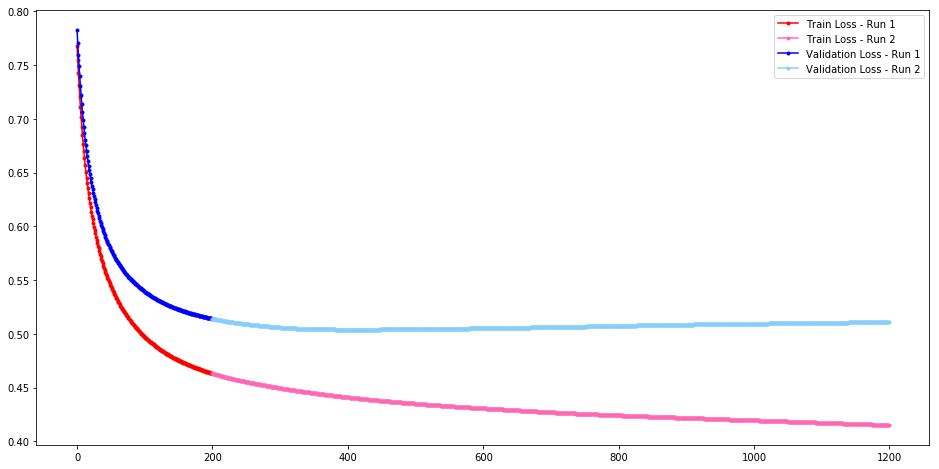

In [42]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?

## Exercise
Now it's your turn.  Do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures

In [77]:
1.# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 6 hidden nodes, relu activation
# 1 hidden layer, 6 hidden nodes, relu activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)


model_2 = Sequential([
    #hidden layers
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    #final layer
    Dense(1, activation="sigmoid")
])

In [78]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])

In [80]:
#Train function!!
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 394us/step - loss: 0.7057 - acc: 0.5122 - val_loss: 0.7086 - val_acc: 0.5208
Epoch 2/1500
576/576 [==============================] - 0s 27us/step - loss: 0.7005 - acc: 0.5260 - val_loss: 0.7038 - val_acc: 0.5365
Epoch 3/1500
576/576 [==============================] - 0s 40us/step - loss: 0.6955 - acc: 0.5330 - val_loss: 0.6993 - val_acc: 0.5417
Epoch 4/1500
576/576 [==============================] - 0s 43us/step - loss: 0.6909 - acc: 0.5417 - val_loss: 0.6950 - val_acc: 0.5521
Epoch 5/1500
576/576 [==============================] - 0s 44us/step - loss: 0.6865 - acc: 0.5556 - val_loss: 0.6910 - val_acc: 0.5573
Epoch 6/1500
576/576 [==============================] - 0s 43us/step - loss: 0.6824 - acc: 0.5660 - val_loss: 0.6872 - val_acc: 0.5781
Epoch 7/1500
576/576 [==============================] - 0s 41us/step - loss: 0.6785 - acc: 0.5677 - val_loss: 0.6836 - val_acc: 0.5885
Epoch 8/

Epoch 61/1500
576/576 [==============================] - 0s 42us/step - loss: 0.5879 - acc: 0.7031 - val_loss: 0.6018 - val_acc: 0.6771
Epoch 62/1500
576/576 [==============================] - 0s 26us/step - loss: 0.5870 - acc: 0.7031 - val_loss: 0.6011 - val_acc: 0.6771
Epoch 63/1500
576/576 [==============================] - 0s 39us/step - loss: 0.5862 - acc: 0.7049 - val_loss: 0.6003 - val_acc: 0.6771
Epoch 64/1500
576/576 [==============================] - 0s 46us/step - loss: 0.5853 - acc: 0.7066 - val_loss: 0.5996 - val_acc: 0.6771
Epoch 65/1500
576/576 [==============================] - 0s 37us/step - loss: 0.5844 - acc: 0.7066 - val_loss: 0.5989 - val_acc: 0.6719
Epoch 66/1500
576/576 [==============================] - 0s 43us/step - loss: 0.5835 - acc: 0.7066 - val_loss: 0.5982 - val_acc: 0.6719
Epoch 67/1500
576/576 [==============================] - 0s 32us/step - loss: 0.5826 - acc: 0.7049 - val_loss: 0.5975 - val_acc: 0.6719
Epoch 68/1500
576/576 [=========================

576/576 [==============================] - 0s 30us/step - loss: 0.5407 - acc: 0.7396 - val_loss: 0.5664 - val_acc: 0.7135
Epoch 122/1500
576/576 [==============================] - 0s 33us/step - loss: 0.5400 - acc: 0.7431 - val_loss: 0.5659 - val_acc: 0.7083
Epoch 123/1500
576/576 [==============================] - 0s 30us/step - loss: 0.5393 - acc: 0.7431 - val_loss: 0.5654 - val_acc: 0.7083
Epoch 124/1500
576/576 [==============================] - 0s 40us/step - loss: 0.5386 - acc: 0.7431 - val_loss: 0.5650 - val_acc: 0.7083
Epoch 125/1500
576/576 [==============================] - 0s 45us/step - loss: 0.5380 - acc: 0.7431 - val_loss: 0.5645 - val_acc: 0.7083
Epoch 126/1500
576/576 [==============================] - 0s 35us/step - loss: 0.5373 - acc: 0.7431 - val_loss: 0.5640 - val_acc: 0.7031
Epoch 127/1500
576/576 [==============================] - 0s 35us/step - loss: 0.5367 - acc: 0.7448 - val_loss: 0.5636 - val_acc: 0.7083
Epoch 128/1500
576/576 [==============================] 

Epoch 181/1500
576/576 [==============================] - 0s 32us/step - loss: 0.5061 - acc: 0.7587 - val_loss: 0.5425 - val_acc: 0.7396
Epoch 182/1500
576/576 [==============================] - 0s 33us/step - loss: 0.5056 - acc: 0.7569 - val_loss: 0.5422 - val_acc: 0.7344
Epoch 183/1500
576/576 [==============================] - 0s 29us/step - loss: 0.5051 - acc: 0.7569 - val_loss: 0.5419 - val_acc: 0.7344
Epoch 184/1500
576/576 [==============================] - 0s 33us/step - loss: 0.5046 - acc: 0.7569 - val_loss: 0.5415 - val_acc: 0.7344
Epoch 185/1500
576/576 [==============================] - 0s 36us/step - loss: 0.5041 - acc: 0.7569 - val_loss: 0.5412 - val_acc: 0.7344
Epoch 186/1500
576/576 [==============================] - 0s 41us/step - loss: 0.5036 - acc: 0.7552 - val_loss: 0.5409 - val_acc: 0.7344
Epoch 187/1500
576/576 [==============================] - 0s 34us/step - loss: 0.5031 - acc: 0.7569 - val_loss: 0.5406 - val_acc: 0.7344
Epoch 188/1500
576/576 [=================

Epoch 241/1500
576/576 [==============================] - 0s 33us/step - loss: 0.4828 - acc: 0.7708 - val_loss: 0.5285 - val_acc: 0.7552
Epoch 242/1500
576/576 [==============================] - 0s 38us/step - loss: 0.4826 - acc: 0.7691 - val_loss: 0.5283 - val_acc: 0.7552
Epoch 243/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4823 - acc: 0.7708 - val_loss: 0.5282 - val_acc: 0.7500
Epoch 244/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4819 - acc: 0.7708 - val_loss: 0.5280 - val_acc: 0.7500
Epoch 245/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4816 - acc: 0.7708 - val_loss: 0.5278 - val_acc: 0.7448
Epoch 246/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4814 - acc: 0.7708 - val_loss: 0.5276 - val_acc: 0.7448
Epoch 247/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4811 - acc: 0.7708 - val_loss: 0.5274 - val_acc: 0.7448
Epoch 248/1500
576/576 [=================

Epoch 301/1500
576/576 [==============================] - 0s 31us/step - loss: 0.4690 - acc: 0.7760 - val_loss: 0.5205 - val_acc: 0.7448
Epoch 302/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4688 - acc: 0.7760 - val_loss: 0.5204 - val_acc: 0.7448
Epoch 303/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4686 - acc: 0.7743 - val_loss: 0.5203 - val_acc: 0.7448
Epoch 304/1500
576/576 [==============================] - 0s 33us/step - loss: 0.4685 - acc: 0.7743 - val_loss: 0.5202 - val_acc: 0.7448
Epoch 305/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4683 - acc: 0.7760 - val_loss: 0.5201 - val_acc: 0.7448
Epoch 306/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4681 - acc: 0.7760 - val_loss: 0.5200 - val_acc: 0.7448
Epoch 307/1500
576/576 [==============================] - 0s 31us/step - loss: 0.4680 - acc: 0.7760 - val_loss: 0.5199 - val_acc: 0.7448
Epoch 308/1500
576/576 [=================

Epoch 361/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4605 - acc: 0.7795 - val_loss: 0.5159 - val_acc: 0.7500
Epoch 362/1500
576/576 [==============================] - 0s 49us/step - loss: 0.4604 - acc: 0.7795 - val_loss: 0.5158 - val_acc: 0.7500
Epoch 363/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4603 - acc: 0.7795 - val_loss: 0.5157 - val_acc: 0.7500
Epoch 364/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4602 - acc: 0.7795 - val_loss: 0.5157 - val_acc: 0.7500
Epoch 365/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4601 - acc: 0.7812 - val_loss: 0.5156 - val_acc: 0.7500
Epoch 366/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4599 - acc: 0.7795 - val_loss: 0.5156 - val_acc: 0.7500
Epoch 367/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4598 - acc: 0.7795 - val_loss: 0.5155 - val_acc: 0.7500
Epoch 368/1500
576/576 [=================

Epoch 421/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4541 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 422/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4540 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 423/1500
576/576 [==============================] - 0s 47us/step - loss: 0.4540 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 424/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4538 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 425/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4538 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 426/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4536 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 427/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4535 - acc: 0.7865 - val_loss: 0.5146 - val_acc: 0.7552
Epoch 428/1500
576/576 [=================

Epoch 481/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4493 - acc: 0.7899 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 482/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4493 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 483/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4492 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 484/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4491 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 485/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4491 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 486/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4490 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 487/1500
576/576 [==============================] - 0s 42us/step - loss: 0.4489 - acc: 0.7882 - val_loss: 0.5150 - val_acc: 0.7500
Epoch 488/1500
576/576 [=================

Epoch 541/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4448 - acc: 0.7847 - val_loss: 0.5153 - val_acc: 0.7396
Epoch 542/1500
576/576 [==============================] - 0s 42us/step - loss: 0.4447 - acc: 0.7847 - val_loss: 0.5153 - val_acc: 0.7396
Epoch 543/1500
576/576 [==============================] - 0s 54us/step - loss: 0.4447 - acc: 0.7847 - val_loss: 0.5153 - val_acc: 0.7396
Epoch 544/1500
576/576 [==============================] - 0s 48us/step - loss: 0.4446 - acc: 0.7847 - val_loss: 0.5154 - val_acc: 0.7396
Epoch 545/1500
576/576 [==============================] - 0s 42us/step - loss: 0.4445 - acc: 0.7847 - val_loss: 0.5154 - val_acc: 0.7396
Epoch 546/1500
576/576 [==============================] - 0s 46us/step - loss: 0.4445 - acc: 0.7847 - val_loss: 0.5154 - val_acc: 0.7396
Epoch 547/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4444 - acc: 0.7847 - val_loss: 0.5154 - val_acc: 0.7396
Epoch 548/1500
576/576 [=================

Epoch 601/1500
576/576 [==============================] - 0s 44us/step - loss: 0.4410 - acc: 0.7778 - val_loss: 0.5164 - val_acc: 0.7500
Epoch 602/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4409 - acc: 0.7778 - val_loss: 0.5164 - val_acc: 0.7500
Epoch 603/1500
576/576 [==============================] - 0s 47us/step - loss: 0.4409 - acc: 0.7778 - val_loss: 0.5164 - val_acc: 0.7500
Epoch 604/1500
576/576 [==============================] - 0s 51us/step - loss: 0.4408 - acc: 0.7778 - val_loss: 0.5164 - val_acc: 0.7500
Epoch 605/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4408 - acc: 0.7778 - val_loss: 0.5165 - val_acc: 0.7500
Epoch 606/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4407 - acc: 0.7778 - val_loss: 0.5165 - val_acc: 0.7500
Epoch 607/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4406 - acc: 0.7778 - val_loss: 0.5165 - val_acc: 0.7500
Epoch 608/1500
576/576 [=================

Epoch 661/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4377 - acc: 0.7812 - val_loss: 0.5183 - val_acc: 0.7552
Epoch 662/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4377 - acc: 0.7812 - val_loss: 0.5183 - val_acc: 0.7552
Epoch 663/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4377 - acc: 0.7812 - val_loss: 0.5183 - val_acc: 0.7552
Epoch 664/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4376 - acc: 0.7812 - val_loss: 0.5183 - val_acc: 0.7552
Epoch 665/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4376 - acc: 0.7812 - val_loss: 0.5184 - val_acc: 0.7552
Epoch 666/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4376 - acc: 0.7812 - val_loss: 0.5184 - val_acc: 0.7552
Epoch 667/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4375 - acc: 0.7812 - val_loss: 0.5184 - val_acc: 0.7552
Epoch 668/1500
576/576 [=================

Epoch 721/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4350 - acc: 0.7951 - val_loss: 0.5197 - val_acc: 0.7448
Epoch 722/1500
576/576 [==============================] - 0s 33us/step - loss: 0.4350 - acc: 0.7951 - val_loss: 0.5198 - val_acc: 0.7396
Epoch 723/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4350 - acc: 0.7969 - val_loss: 0.5198 - val_acc: 0.7396
Epoch 724/1500
576/576 [==============================] - 0s 47us/step - loss: 0.4349 - acc: 0.7969 - val_loss: 0.5198 - val_acc: 0.7396
Epoch 725/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4348 - acc: 0.7969 - val_loss: 0.5198 - val_acc: 0.7396
Epoch 726/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4348 - acc: 0.7986 - val_loss: 0.5199 - val_acc: 0.7396
Epoch 727/1500
576/576 [==============================] - 0s 38us/step - loss: 0.4348 - acc: 0.8003 - val_loss: 0.5199 - val_acc: 0.7396
Epoch 728/1500
576/576 [=================

Epoch 781/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4325 - acc: 0.8021 - val_loss: 0.5213 - val_acc: 0.7396
Epoch 782/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4325 - acc: 0.8021 - val_loss: 0.5213 - val_acc: 0.7396
Epoch 783/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4325 - acc: 0.8021 - val_loss: 0.5213 - val_acc: 0.7396
Epoch 784/1500
576/576 [==============================] - 0s 41us/step - loss: 0.4324 - acc: 0.8021 - val_loss: 0.5213 - val_acc: 0.7396
Epoch 785/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4324 - acc: 0.8021 - val_loss: 0.5214 - val_acc: 0.7396
Epoch 786/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4324 - acc: 0.8021 - val_loss: 0.5214 - val_acc: 0.7396
Epoch 787/1500
576/576 [==============================] - 0s 42us/step - loss: 0.4323 - acc: 0.8021 - val_loss: 0.5214 - val_acc: 0.7396
Epoch 788/1500
576/576 [=================

Epoch 900/1500
576/576 [==============================] - 0s 33us/step - loss: 0.4287 - acc: 0.8056 - val_loss: 0.5236 - val_acc: 0.7448
Epoch 901/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4287 - acc: 0.8056 - val_loss: 0.5236 - val_acc: 0.7448
Epoch 902/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4286 - acc: 0.8056 - val_loss: 0.5236 - val_acc: 0.7448
Epoch 903/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4286 - acc: 0.8056 - val_loss: 0.5236 - val_acc: 0.7500
Epoch 904/1500
576/576 [==============================] - 0s 33us/step - loss: 0.4286 - acc: 0.8038 - val_loss: 0.5236 - val_acc: 0.7448
Epoch 905/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4286 - acc: 0.8056 - val_loss: 0.5237 - val_acc: 0.7500
Epoch 906/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4285 - acc: 0.8038 - val_loss: 0.5237 - val_acc: 0.7500
Epoch 907/1500
576/576 [=================

Epoch 960/1500
576/576 [==============================] - 0s 34us/step - loss: 0.4272 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 961/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4271 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 962/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4271 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 963/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4271 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 964/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4270 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 965/1500
576/576 [==============================] - 0s 39us/step - loss: 0.4270 - acc: 0.8021 - val_loss: 0.5245 - val_acc: 0.7448
Epoch 966/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4270 - acc: 0.8021 - val_loss: 0.5246 - val_acc: 0.7448
Epoch 967/1500
576/576 [=================

576/576 [==============================] - 0s 32us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5261 - val_acc: 0.7500
Epoch 1079/1500
576/576 [==============================] - 0s 38us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5261 - val_acc: 0.7500
Epoch 1080/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5261 - val_acc: 0.7500
Epoch 1081/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5261 - val_acc: 0.7500
Epoch 1082/1500
576/576 [==============================] - 0s 36us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5262 - val_acc: 0.7500
Epoch 1083/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4241 - acc: 0.8003 - val_loss: 0.5262 - val_acc: 0.7500
Epoch 1084/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4240 - acc: 0.8003 - val_loss: 0.5262 - val_acc: 0.7500
Epoch 1085/1500
576/576 [=========================

576/576 [==============================] - 0s 40us/step - loss: 0.4215 - acc: 0.8021 - val_loss: 0.5270 - val_acc: 0.7552
Epoch 1197/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4215 - acc: 0.8038 - val_loss: 0.5270 - val_acc: 0.7552
Epoch 1198/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4215 - acc: 0.8038 - val_loss: 0.5271 - val_acc: 0.7552
Epoch 1199/1500
576/576 [==============================] - 0s 43us/step - loss: 0.4215 - acc: 0.8038 - val_loss: 0.5271 - val_acc: 0.7552
Epoch 1200/1500
576/576 [==============================] - 0s 50us/step - loss: 0.4214 - acc: 0.8038 - val_loss: 0.5271 - val_acc: 0.7552
Epoch 1201/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4214 - acc: 0.8038 - val_loss: 0.5271 - val_acc: 0.7552
Epoch 1202/1500
576/576 [==============================] - 0s 40us/step - loss: 0.4214 - acc: 0.8038 - val_loss: 0.5271 - val_acc: 0.7552
Epoch 1203/1500
576/576 [=========================

576/576 [==============================] - 0s 39us/step - loss: 0.4186 - acc: 0.8125 - val_loss: 0.5297 - val_acc: 0.7552
Epoch 1315/1500
576/576 [==============================] - 0s 44us/step - loss: 0.4186 - acc: 0.8125 - val_loss: 0.5297 - val_acc: 0.7552
Epoch 1316/1500
576/576 [==============================] - 0s 38us/step - loss: 0.4186 - acc: 0.8125 - val_loss: 0.5297 - val_acc: 0.7552
Epoch 1317/1500
576/576 [==============================] - 0s 37us/step - loss: 0.4185 - acc: 0.8142 - val_loss: 0.5298 - val_acc: 0.7552
Epoch 1318/1500
576/576 [==============================] - 0s 45us/step - loss: 0.4185 - acc: 0.8142 - val_loss: 0.5298 - val_acc: 0.7552
Epoch 1319/1500
576/576 [==============================] - 0s 38us/step - loss: 0.4185 - acc: 0.8142 - val_loss: 0.5298 - val_acc: 0.7552
Epoch 1320/1500
576/576 [==============================] - 0s 42us/step - loss: 0.4185 - acc: 0.8125 - val_loss: 0.5298 - val_acc: 0.7552
Epoch 1321/1500
576/576 [=========================

576/576 [==============================] - 0s 48us/step - loss: 0.4154 - acc: 0.8177 - val_loss: 0.5329 - val_acc: 0.7448
Epoch 1433/1500
576/576 [==============================] - 0s 47us/step - loss: 0.4154 - acc: 0.8194 - val_loss: 0.5329 - val_acc: 0.7448
Epoch 1434/1500
576/576 [==============================] - 0s 32us/step - loss: 0.4153 - acc: 0.8177 - val_loss: 0.5330 - val_acc: 0.7448
Epoch 1435/1500
576/576 [==============================] - 0s 26us/step - loss: 0.4153 - acc: 0.8194 - val_loss: 0.5330 - val_acc: 0.7448
Epoch 1436/1500
576/576 [==============================] - 0s 26us/step - loss: 0.4153 - acc: 0.8177 - val_loss: 0.5330 - val_acc: 0.7448
Epoch 1437/1500
576/576 [==============================] - 0s 27us/step - loss: 0.4153 - acc: 0.8194 - val_loss: 0.5330 - val_acc: 0.7448
Epoch 1438/1500
576/576 [==============================] - 0s 49us/step - loss: 0.4152 - acc: 0.8194 - val_loss: 0.5331 - val_acc: 0.7448
Epoch 1439/1500
576/576 [=========================

In [82]:
#There is not a big improvement when training with 2x as many epochs
run_hist_2b = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=3000)


Train on 576 samples, validate on 192 samples
Epoch 1/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4139 - acc: 0.8194 - val_loss: 0.5349 - val_acc: 0.7448
Epoch 2/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4139 - acc: 0.8194 - val_loss: 0.5349 - val_acc: 0.7448
Epoch 3/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4138 - acc: 0.8194 - val_loss: 0.5350 - val_acc: 0.7448
Epoch 4/3000
576/576 [==============================] - 0s 54us/step - loss: 0.4138 - acc: 0.8194 - val_loss: 0.5350 - val_acc: 0.7448
Epoch 5/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4138 - acc: 0.8194 - val_loss: 0.5350 - val_acc: 0.7448
Epoch 6/3000
576/576 [==============================] - 0s 48us/step - loss: 0.4138 - acc: 0.8212 - val_loss: 0.5351 - val_acc: 0.7448
Epoch 7/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4137 - acc: 0.8212 - val_loss: 0.5351 - val_acc: 0.7448
Epoch 8/3

Epoch 61/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4128 - acc: 0.8264 - val_loss: 0.5365 - val_acc: 0.7396
Epoch 62/3000
576/576 [==============================] - 0s 42us/step - loss: 0.4128 - acc: 0.8264 - val_loss: 0.5365 - val_acc: 0.7396
Epoch 63/3000
576/576 [==============================] - 0s 51us/step - loss: 0.4127 - acc: 0.8264 - val_loss: 0.5365 - val_acc: 0.7396
Epoch 64/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4127 - acc: 0.8264 - val_loss: 0.5366 - val_acc: 0.7396
Epoch 65/3000
576/576 [==============================] - 0s 32us/step - loss: 0.4127 - acc: 0.8264 - val_loss: 0.5366 - val_acc: 0.7396
Epoch 66/3000
576/576 [==============================] - 0s 43us/step - loss: 0.4127 - acc: 0.8264 - val_loss: 0.5366 - val_acc: 0.7396
Epoch 67/3000
576/576 [==============================] - 0s 46us/step - loss: 0.4127 - acc: 0.8264 - val_loss: 0.5366 - val_acc: 0.7396
Epoch 68/3000
576/576 [=========================

576/576 [==============================] - 0s 34us/step - loss: 0.4119 - acc: 0.8247 - val_loss: 0.5379 - val_acc: 0.7396
Epoch 122/3000
576/576 [==============================] - 0s 31us/step - loss: 0.4119 - acc: 0.8264 - val_loss: 0.5379 - val_acc: 0.7396
Epoch 123/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4119 - acc: 0.8264 - val_loss: 0.5379 - val_acc: 0.7396
Epoch 124/3000
576/576 [==============================] - 0s 40us/step - loss: 0.4119 - acc: 0.8264 - val_loss: 0.5380 - val_acc: 0.7396
Epoch 125/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4118 - acc: 0.8264 - val_loss: 0.5380 - val_acc: 0.7396
Epoch 126/3000
576/576 [==============================] - 0s 41us/step - loss: 0.4118 - acc: 0.8264 - val_loss: 0.5380 - val_acc: 0.7396
Epoch 127/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4118 - acc: 0.8247 - val_loss: 0.5381 - val_acc: 0.7396
Epoch 128/3000
576/576 [==============================] 

Epoch 181/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4109 - acc: 0.8247 - val_loss: 0.5398 - val_acc: 0.7448
Epoch 182/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5398 - val_acc: 0.7448
Epoch 183/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5399 - val_acc: 0.7448
Epoch 184/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5399 - val_acc: 0.7448
Epoch 185/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5399 - val_acc: 0.7448
Epoch 186/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5399 - val_acc: 0.7448
Epoch 187/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4108 - acc: 0.8247 - val_loss: 0.5400 - val_acc: 0.7448
Epoch 188/3000
576/576 [=================

Epoch 241/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4096 - acc: 0.8212 - val_loss: 0.5423 - val_acc: 0.7448
Epoch 242/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4097 - acc: 0.8229 - val_loss: 0.5423 - val_acc: 0.7448
Epoch 243/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4096 - acc: 0.8229 - val_loss: 0.5424 - val_acc: 0.7448
Epoch 244/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4097 - acc: 0.8212 - val_loss: 0.5424 - val_acc: 0.7448
Epoch 245/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4096 - acc: 0.8229 - val_loss: 0.5424 - val_acc: 0.7448
Epoch 246/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4095 - acc: 0.8212 - val_loss: 0.5425 - val_acc: 0.7448
Epoch 247/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4096 - acc: 0.8212 - val_loss: 0.5425 - val_acc: 0.7448
Epoch 248/3000
576/576 [=================

Epoch 301/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5441 - val_acc: 0.7396
Epoch 302/3000
576/576 [==============================] - 0s 32us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5441 - val_acc: 0.7396
Epoch 303/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5441 - val_acc: 0.7396
Epoch 304/3000
576/576 [==============================] - 0s 43us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5441 - val_acc: 0.7396
Epoch 305/3000
576/576 [==============================] - 0s 40us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5442 - val_acc: 0.7396
Epoch 306/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4085 - acc: 0.8229 - val_loss: 0.5442 - val_acc: 0.7396
Epoch 307/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4084 - acc: 0.8229 - val_loss: 0.5442 - val_acc: 0.7396
Epoch 308/3000
576/576 [=================

Epoch 361/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4077 - acc: 0.8264 - val_loss: 0.5454 - val_acc: 0.7500
Epoch 362/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4077 - acc: 0.8247 - val_loss: 0.5454 - val_acc: 0.7500
Epoch 363/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4076 - acc: 0.8264 - val_loss: 0.5454 - val_acc: 0.7500
Epoch 364/3000
576/576 [==============================] - 0s 41us/step - loss: 0.4076 - acc: 0.8264 - val_loss: 0.5454 - val_acc: 0.7500
Epoch 365/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4076 - acc: 0.8247 - val_loss: 0.5455 - val_acc: 0.7500
Epoch 366/3000
576/576 [==============================] - 0s 47us/step - loss: 0.4076 - acc: 0.8264 - val_loss: 0.5455 - val_acc: 0.7500
Epoch 367/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4076 - acc: 0.8247 - val_loss: 0.5455 - val_acc: 0.7500
Epoch 368/3000
576/576 [=================

Epoch 421/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4067 - acc: 0.8247 - val_loss: 0.5465 - val_acc: 0.7500
Epoch 422/3000
576/576 [==============================] - 0s 32us/step - loss: 0.4067 - acc: 0.8247 - val_loss: 0.5465 - val_acc: 0.7500
Epoch 423/3000
576/576 [==============================] - 0s 33us/step - loss: 0.4067 - acc: 0.8247 - val_loss: 0.5465 - val_acc: 0.7500
Epoch 424/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4067 - acc: 0.8247 - val_loss: 0.5466 - val_acc: 0.7500
Epoch 425/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4067 - acc: 0.8247 - val_loss: 0.5466 - val_acc: 0.7500
Epoch 426/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4066 - acc: 0.8247 - val_loss: 0.5466 - val_acc: 0.7500
Epoch 427/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4067 - acc: 0.8229 - val_loss: 0.5466 - val_acc: 0.7500
Epoch 428/3000
576/576 [=================

Epoch 540/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4046 - acc: 0.8177 - val_loss: 0.5477 - val_acc: 0.7448
Epoch 541/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4046 - acc: 0.8177 - val_loss: 0.5477 - val_acc: 0.7448
Epoch 542/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4045 - acc: 0.8177 - val_loss: 0.5477 - val_acc: 0.7448
Epoch 543/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4045 - acc: 0.8177 - val_loss: 0.5477 - val_acc: 0.7448
Epoch 544/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4045 - acc: 0.8177 - val_loss: 0.5477 - val_acc: 0.7448
Epoch 545/3000
576/576 [==============================] - 0s 43us/step - loss: 0.4045 - acc: 0.8177 - val_loss: 0.5478 - val_acc: 0.7448
Epoch 546/3000
576/576 [==============================] - 0s 41us/step - loss: 0.4045 - acc: 0.8177 - val_loss: 0.5478 - val_acc: 0.7448
Epoch 547/3000
576/576 [=================

Epoch 600/3000
576/576 [==============================] - 0s 31us/step - loss: 0.4038 - acc: 0.8177 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 601/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 602/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5483 - val_acc: 0.7500
Epoch 603/3000
576/576 [==============================] - 0s 39us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5483 - val_acc: 0.7500
Epoch 604/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5483 - val_acc: 0.7500
Epoch 605/3000
576/576 [==============================] - 0s 44us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5483 - val_acc: 0.7500
Epoch 606/3000
576/576 [==============================] - 0s 29us/step - loss: 0.4037 - acc: 0.8177 - val_loss: 0.5483 - val_acc: 0.7500
Epoch 607/3000
576/576 [=================

Epoch 660/3000
576/576 [==============================] - 0s 34us/step - loss: 0.4029 - acc: 0.8194 - val_loss: 0.5489 - val_acc: 0.7552
Epoch 661/3000
576/576 [==============================] - 0s 44us/step - loss: 0.4029 - acc: 0.8194 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 662/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4029 - acc: 0.8177 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 663/3000
576/576 [==============================] - 0s 43us/step - loss: 0.4029 - acc: 0.8194 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 664/3000
576/576 [==============================] - 0s 37us/step - loss: 0.4029 - acc: 0.8194 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 665/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4029 - acc: 0.8194 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 666/3000
576/576 [==============================] - 0s 48us/step - loss: 0.4028 - acc: 0.8194 - val_loss: 0.5490 - val_acc: 0.7552
Epoch 667/3000
576/576 [=================

Epoch 720/3000
576/576 [==============================] - 0s 42us/step - loss: 0.4021 - acc: 0.8177 - val_loss: 0.5495 - val_acc: 0.7656
Epoch 721/3000
576/576 [==============================] - 0s 32us/step - loss: 0.4021 - acc: 0.8160 - val_loss: 0.5495 - val_acc: 0.7656
Epoch 722/3000
576/576 [==============================] - 0s 38us/step - loss: 0.4021 - acc: 0.8177 - val_loss: 0.5495 - val_acc: 0.7656
Epoch 723/3000
576/576 [==============================] - 0s 40us/step - loss: 0.4021 - acc: 0.8177 - val_loss: 0.5496 - val_acc: 0.7656
Epoch 724/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4021 - acc: 0.8194 - val_loss: 0.5496 - val_acc: 0.7656
Epoch 725/3000
576/576 [==============================] - 0s 26us/step - loss: 0.4020 - acc: 0.8177 - val_loss: 0.5496 - val_acc: 0.7656
Epoch 726/3000
576/576 [==============================] - 0s 31us/step - loss: 0.4020 - acc: 0.8177 - val_loss: 0.5496 - val_acc: 0.7656
Epoch 727/3000
576/576 [=================

Epoch 780/3000
576/576 [==============================] - 0s 58us/step - loss: 0.4012 - acc: 0.8125 - val_loss: 0.5501 - val_acc: 0.7708
Epoch 781/3000
576/576 [==============================] - 0s 36us/step - loss: 0.4011 - acc: 0.8142 - val_loss: 0.5501 - val_acc: 0.7708
Epoch 782/3000
576/576 [==============================] - 0s 30us/step - loss: 0.4012 - acc: 0.8142 - val_loss: 0.5502 - val_acc: 0.7708
Epoch 783/3000
576/576 [==============================] - 0s 45us/step - loss: 0.4012 - acc: 0.8142 - val_loss: 0.5502 - val_acc: 0.7708
Epoch 784/3000
576/576 [==============================] - 0s 57us/step - loss: 0.4011 - acc: 0.8125 - val_loss: 0.5502 - val_acc: 0.7708
Epoch 785/3000
576/576 [==============================] - 0s 40us/step - loss: 0.4011 - acc: 0.8142 - val_loss: 0.5502 - val_acc: 0.7708
Epoch 786/3000
576/576 [==============================] - 0s 28us/step - loss: 0.4011 - acc: 0.8142 - val_loss: 0.5502 - val_acc: 0.7708
Epoch 787/3000
576/576 [=================

Epoch 840/3000
576/576 [==============================] - 0s 28us/step - loss: 0.4003 - acc: 0.8142 - val_loss: 0.5510 - val_acc: 0.7708
Epoch 841/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4003 - acc: 0.8142 - val_loss: 0.5510 - val_acc: 0.7708
Epoch 842/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4003 - acc: 0.8125 - val_loss: 0.5511 - val_acc: 0.7708
Epoch 843/3000
576/576 [==============================] - 0s 41us/step - loss: 0.4003 - acc: 0.8142 - val_loss: 0.5510 - val_acc: 0.7708
Epoch 844/3000
576/576 [==============================] - 0s 32us/step - loss: 0.4003 - acc: 0.8142 - val_loss: 0.5510 - val_acc: 0.7708
Epoch 845/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4002 - acc: 0.8142 - val_loss: 0.5510 - val_acc: 0.7708
Epoch 846/3000
576/576 [==============================] - 0s 35us/step - loss: 0.4003 - acc: 0.8125 - val_loss: 0.5511 - val_acc: 0.7708
Epoch 847/3000
576/576 [=================

Epoch 900/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3997 - acc: 0.8160 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 901/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3997 - acc: 0.8160 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 902/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3997 - acc: 0.8142 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 903/3000
576/576 [==============================] - 0s 40us/step - loss: 0.3997 - acc: 0.8160 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 904/3000
576/576 [==============================] - 0s 39us/step - loss: 0.3997 - acc: 0.8125 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 905/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3997 - acc: 0.8160 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 906/3000
576/576 [==============================] - 0s 43us/step - loss: 0.3997 - acc: 0.8142 - val_loss: 0.5517 - val_acc: 0.7708
Epoch 907/3000
576/576 [=================

Epoch 960/3000
576/576 [==============================] - 0s 40us/step - loss: 0.3991 - acc: 0.8160 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 961/3000
576/576 [==============================] - 0s 49us/step - loss: 0.3992 - acc: 0.8125 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 962/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3991 - acc: 0.8142 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 963/3000
576/576 [==============================] - 0s 69us/step - loss: 0.3991 - acc: 0.8142 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 964/3000
576/576 [==============================] - 0s 54us/step - loss: 0.3992 - acc: 0.8125 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 965/3000
576/576 [==============================] - 0s 57us/step - loss: 0.3991 - acc: 0.8125 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 966/3000
576/576 [==============================] - 0s 42us/step - loss: 0.3991 - acc: 0.8125 - val_loss: 0.5519 - val_acc: 0.7708
Epoch 967/3000
576/576 [=================

576/576 [==============================] - 0s 39us/step - loss: 0.3983 - acc: 0.8160 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1079/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3983 - acc: 0.8125 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1080/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3983 - acc: 0.8142 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1081/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3982 - acc: 0.8142 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1082/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3983 - acc: 0.8142 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1083/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3982 - acc: 0.8142 - val_loss: 0.5531 - val_acc: 0.7760
Epoch 1084/3000
576/576 [==============================] - 0s 42us/step - loss: 0.3982 - acc: 0.8160 - val_loss: 0.5530 - val_acc: 0.7760
Epoch 1085/3000
576/576 [=========================

576/576 [==============================] - 0s 63us/step - loss: 0.3976 - acc: 0.8160 - val_loss: 0.5537 - val_acc: 0.7760
Epoch 1197/3000
576/576 [==============================] - 0s 50us/step - loss: 0.3975 - acc: 0.8160 - val_loss: 0.5537 - val_acc: 0.7760
Epoch 1198/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3975 - acc: 0.8160 - val_loss: 0.5538 - val_acc: 0.7760
Epoch 1199/3000
576/576 [==============================] - 0s 29us/step - loss: 0.3976 - acc: 0.8160 - val_loss: 0.5538 - val_acc: 0.7760
Epoch 1200/3000
576/576 [==============================] - 0s 41us/step - loss: 0.3975 - acc: 0.8160 - val_loss: 0.5538 - val_acc: 0.7760
Epoch 1201/3000
576/576 [==============================] - 0s 30us/step - loss: 0.3976 - acc: 0.8160 - val_loss: 0.5538 - val_acc: 0.7760
Epoch 1202/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3976 - acc: 0.8160 - val_loss: 0.5538 - val_acc: 0.7760
Epoch 1203/3000
576/576 [=========================

576/576 [==============================] - 0s 37us/step - loss: 0.3969 - acc: 0.8142 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1315/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3968 - acc: 0.8142 - val_loss: 0.5544 - val_acc: 0.7760
Epoch 1316/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3969 - acc: 0.8125 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1317/3000
576/576 [==============================] - 0s 41us/step - loss: 0.3968 - acc: 0.8125 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1318/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3968 - acc: 0.8125 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1319/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3968 - acc: 0.8125 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1320/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3968 - acc: 0.8125 - val_loss: 0.5545 - val_acc: 0.7760
Epoch 1321/3000
576/576 [=========================

576/576 [==============================] - 0s 33us/step - loss: 0.3959 - acc: 0.8142 - val_loss: 0.5561 - val_acc: 0.7708
Epoch 1433/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3960 - acc: 0.8142 - val_loss: 0.5561 - val_acc: 0.7708
Epoch 1434/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3960 - acc: 0.8142 - val_loss: 0.5562 - val_acc: 0.7708
Epoch 1435/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3959 - acc: 0.8142 - val_loss: 0.5562 - val_acc: 0.7708
Epoch 1436/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3959 - acc: 0.8142 - val_loss: 0.5562 - val_acc: 0.7708
Epoch 1437/3000
576/576 [==============================] - 0s 41us/step - loss: 0.3958 - acc: 0.8142 - val_loss: 0.5562 - val_acc: 0.7708
Epoch 1438/3000
576/576 [==============================] - 0s 39us/step - loss: 0.3959 - acc: 0.8142 - val_loss: 0.5563 - val_acc: 0.7708
Epoch 1439/3000
576/576 [=========================

576/576 [==============================] - 0s 38us/step - loss: 0.3941 - acc: 0.8177 - val_loss: 0.5587 - val_acc: 0.7708
Epoch 1551/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3940 - acc: 0.8177 - val_loss: 0.5588 - val_acc: 0.7708
Epoch 1552/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3940 - acc: 0.8177 - val_loss: 0.5588 - val_acc: 0.7708
Epoch 1553/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3940 - acc: 0.8177 - val_loss: 0.5588 - val_acc: 0.7708
Epoch 1554/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3940 - acc: 0.8177 - val_loss: 0.5589 - val_acc: 0.7708
Epoch 1555/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3940 - acc: 0.8177 - val_loss: 0.5588 - val_acc: 0.7708
Epoch 1556/3000
576/576 [==============================] - 0s 26us/step - loss: 0.3939 - acc: 0.8177 - val_loss: 0.5589 - val_acc: 0.7708
Epoch 1557/3000
576/576 [=========================

576/576 [==============================] - 0s 45us/step - loss: 0.3924 - acc: 0.8194 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 1669/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3924 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1670/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3924 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1671/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3923 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1672/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3923 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1673/3000
576/576 [==============================] - 0s 40us/step - loss: 0.3923 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1674/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3923 - acc: 0.8194 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 1675/3000
576/576 [=========================

576/576 [==============================] - 0s 35us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5607 - val_acc: 0.7708
Epoch 1787/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5608 - val_acc: 0.7708
Epoch 1788/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3915 - acc: 0.8212 - val_loss: 0.5608 - val_acc: 0.7708
Epoch 1789/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5608 - val_acc: 0.7708
Epoch 1790/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5608 - val_acc: 0.7708
Epoch 1791/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5609 - val_acc: 0.7708
Epoch 1792/3000
576/576 [==============================] - 0s 32us/step - loss: 0.3915 - acc: 0.8194 - val_loss: 0.5608 - val_acc: 0.7708
Epoch 1793/3000
576/576 [=========================

576/576 [==============================] - 0s 53us/step - loss: 0.3908 - acc: 0.8194 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1905/3000
576/576 [==============================] - 0s 44us/step - loss: 0.3908 - acc: 0.8194 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1906/3000
576/576 [==============================] - 0s 39us/step - loss: 0.3907 - acc: 0.8194 - val_loss: 0.5611 - val_acc: 0.7656
Epoch 1907/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3908 - acc: 0.8194 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1908/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3907 - acc: 0.8212 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1909/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3908 - acc: 0.8194 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1910/3000
576/576 [==============================] - 0s 39us/step - loss: 0.3907 - acc: 0.8194 - val_loss: 0.5612 - val_acc: 0.7656
Epoch 1911/3000
576/576 [=========================

576/576 [==============================] - 0s 31us/step - loss: 0.3901 - acc: 0.8229 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2023/3000
576/576 [==============================] - 0s 29us/step - loss: 0.3900 - acc: 0.8212 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2024/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3900 - acc: 0.8229 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2025/3000
576/576 [==============================] - 0s 38us/step - loss: 0.3901 - acc: 0.8212 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2026/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3900 - acc: 0.8212 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2027/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3900 - acc: 0.8212 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2028/3000
576/576 [==============================] - 0s 44us/step - loss: 0.3900 - acc: 0.8247 - val_loss: 0.5607 - val_acc: 0.7656
Epoch 2029/3000
576/576 [=========================

576/576 [==============================] - 0s 47us/step - loss: 0.3893 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2141/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3893 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2142/3000
576/576 [==============================] - 0s 37us/step - loss: 0.3892 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2143/3000
576/576 [==============================] - 0s 43us/step - loss: 0.3893 - acc: 0.8229 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2144/3000
576/576 [==============================] - 0s 41us/step - loss: 0.3893 - acc: 0.8247 - val_loss: 0.5606 - val_acc: 0.7656
Epoch 2145/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3893 - acc: 0.8229 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2146/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3893 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2147/3000
576/576 [=========================

576/576 [==============================] - 0s 37us/step - loss: 0.3887 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2259/3000
576/576 [==============================] - 0s 32us/step - loss: 0.3886 - acc: 0.8229 - val_loss: 0.5606 - val_acc: 0.7656
Epoch 2260/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3887 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2261/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3887 - acc: 0.8229 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2262/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3887 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2263/3000
576/576 [==============================] - 0s 32us/step - loss: 0.3887 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7656
Epoch 2264/3000
576/576 [==============================] - 0s 42us/step - loss: 0.3887 - acc: 0.8247 - val_loss: 0.5605 - val_acc: 0.7708
Epoch 2265/3000
576/576 [=========================

576/576 [==============================] - 0s 38us/step - loss: 0.3882 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 2377/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3882 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 2378/3000
576/576 [==============================] - 0s 27us/step - loss: 0.3882 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 2379/3000
576/576 [==============================] - 0s 42us/step - loss: 0.3881 - acc: 0.8247 - val_loss: 0.5602 - val_acc: 0.7708
Epoch 2380/3000
576/576 [==============================] - 0s 45us/step - loss: 0.3881 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 2381/3000
576/576 [==============================] - 0s 47us/step - loss: 0.3882 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7656
Epoch 2382/3000
576/576 [==============================] - 0s 59us/step - loss: 0.3882 - acc: 0.8247 - val_loss: 0.5601 - val_acc: 0.7708
Epoch 2383/3000
576/576 [=========================

Epoch 2494/3000
576/576 [==============================] - 0s 51us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2495/3000
576/576 [==============================] - 0s 43us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2496/3000
576/576 [==============================] - 0s 46us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2497/3000
576/576 [==============================] - 0s 30us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2498/3000
576/576 [==============================] - 0s 50us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2499/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3877 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 2500/3000
576/576 [==============================] - 0s 76us/step - loss: 0.3878 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 2501/3000
576/576 [=========

576/576 [==============================] - 0s 61us/step - loss: 0.3873 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 2613/3000
576/576 [==============================] - 0s 90us/step - loss: 0.3873 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2614/3000
576/576 [==============================] - 0s 72us/step - loss: 0.3874 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2615/3000
576/576 [==============================] - 0s 67us/step - loss: 0.3873 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2616/3000
576/576 [==============================] - 0s 58us/step - loss: 0.3873 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2617/3000
576/576 [==============================] - 0s 35us/step - loss: 0.3874 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2618/3000
576/576 [==============================] - 0s 51us/step - loss: 0.3873 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2619/3000
576/576 [=========================

576/576 [==============================] - 0s 50us/step - loss: 0.3869 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2731/3000
576/576 [==============================] - 0s 44us/step - loss: 0.3868 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2732/3000
576/576 [==============================] - 0s 53us/step - loss: 0.3868 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2733/3000
576/576 [==============================] - 0s 42us/step - loss: 0.3868 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2734/3000
576/576 [==============================] - 0s 56us/step - loss: 0.3869 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2735/3000
576/576 [==============================] - 0s 54us/step - loss: 0.3869 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2736/3000
576/576 [==============================] - 0s 39us/step - loss: 0.3868 - acc: 0.8264 - val_loss: 0.5596 - val_acc: 0.7656
Epoch 2737/3000
576/576 [=========================

576/576 [==============================] - 0s 34us/step - loss: 0.3864 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2849/3000
576/576 [==============================] - 0s 41us/step - loss: 0.3864 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2850/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3864 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2851/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3865 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7656
Epoch 2852/3000
576/576 [==============================] - 0s 48us/step - loss: 0.3865 - acc: 0.8264 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2853/3000
576/576 [==============================] - 0s 53us/step - loss: 0.3865 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2854/3000
576/576 [==============================] - 0s 31us/step - loss: 0.3864 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7656
Epoch 2855/3000
576/576 [=========================

576/576 [==============================] - 0s 43us/step - loss: 0.3861 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2967/3000
576/576 [==============================] - 0s 29us/step - loss: 0.3861 - acc: 0.8281 - val_loss: 0.5600 - val_acc: 0.7708
Epoch 2968/3000
576/576 [==============================] - 0s 36us/step - loss: 0.3860 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2969/3000
576/576 [==============================] - 0s 30us/step - loss: 0.3861 - acc: 0.8281 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 2970/3000
576/576 [==============================] - 0s 34us/step - loss: 0.3861 - acc: 0.8264 - val_loss: 0.5598 - val_acc: 0.7708
Epoch 2971/3000
576/576 [==============================] - 0s 33us/step - loss: 0.3861 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2972/3000
576/576 [==============================] - 0s 32us/step - loss: 0.3860 - acc: 0.8281 - val_loss: 0.5599 - val_acc: 0.7708
Epoch 2973/3000
576/576 [=========================

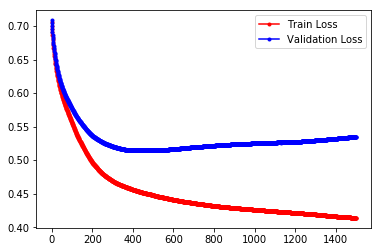

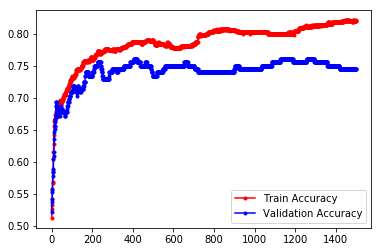

In [81]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()


fig, ax = plt.subplots()
ax.plot(run_hist_2.history["acc"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()









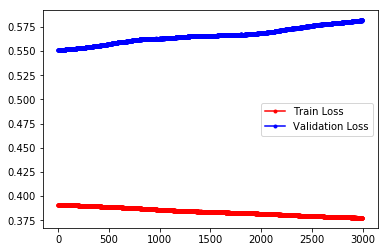

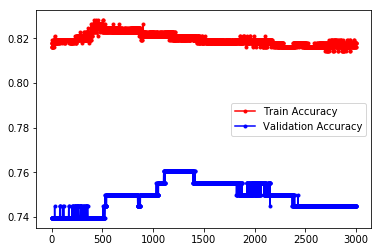

In [76]:
fig, ax = plt.subplots()
ax.plot(run_hist_2b.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2b.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()


fig, ax = plt.subplots()
ax.plot(run_hist_2b.history["acc"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2b.history["val_acc"],'b', marker='.', label="Validation Accuracy")
ax.legend()






In [69]:
run_hist_2.history()